In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
dataset_path = ('dataset/')

In [28]:
#Load the images and labels
labels = ['Beagle', 'Labrador_Retriever','Golden_Retriever', 'German_Shepherd', 'Rottweiler', 'Poodle', 'Bulldog', 'Boxer', 'Yorkshire_Terrier', 'Dachshund']
images = []
classes = []

for label in labels:
    for file in os.listdir(dataset_path + label):
        img = Image.open(dataset_path + str(label) + '/' + str(file))
        img = img.resize((64,64))
        arr = np.array(img)
        images.append(arr)
        classes.append(label)

images = np.array(images)
classes = np.array(classes)

In [30]:
classes

array(['Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle',
       'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beagle', 'Beag

In [32]:
# Encode the labels
le = LabelEncoder()
classes = le.fit_transform(classes)

In [36]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.2, random_state=42)

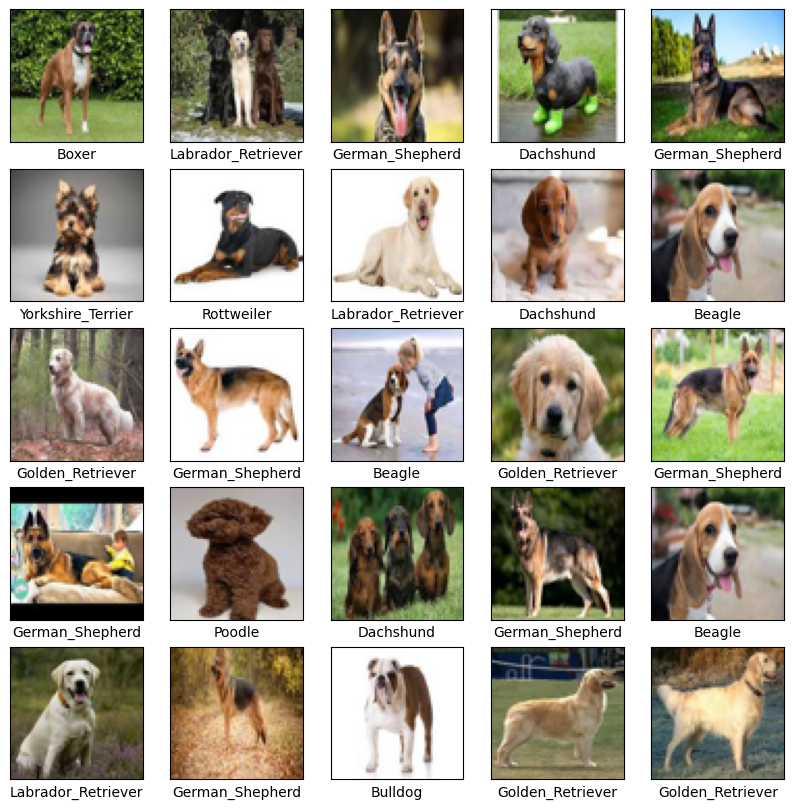

In [40]:
#Visualize some images
def plot_images(images, labels, classes):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i]])
    plt.show()

plot_images(X_train, y_train, le.classes_)

In [44]:
#Neural Network Architecture
model = Sequential([
    Conv2D(8, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(8, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(8, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(len(labels), activation='softmax')

])

In [46]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
#Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1414 - loss: 3.8641 - val_accuracy: 0.2113 - val_loss: 2.1725
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2656 - loss: 1.9755 - val_accuracy: 0.2990 - val_loss: 1.8475
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4946 - loss: 1.5238 - val_accuracy: 0.4948 - val_loss: 1.4745
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6419 - loss: 1.1410 - val_accuracy: 0.6495 - val_loss: 1.1496
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7793 - loss: 0.7724 - val_accuracy: 0.7680 - val_loss: 0.8120
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8908 - loss: 0.4803 - val_accuracy: 0.8351 - val_loss: 0.5358
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9215 - loss: 0.2998 - val_accuracy: 0.8711 - val_loss: 0.3911
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.1981 - val_accuracy: 0.9381 - val_loss:

In [50]:
#Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9764 - loss: 0.1372 
Test accuracy: 0.969072163105011


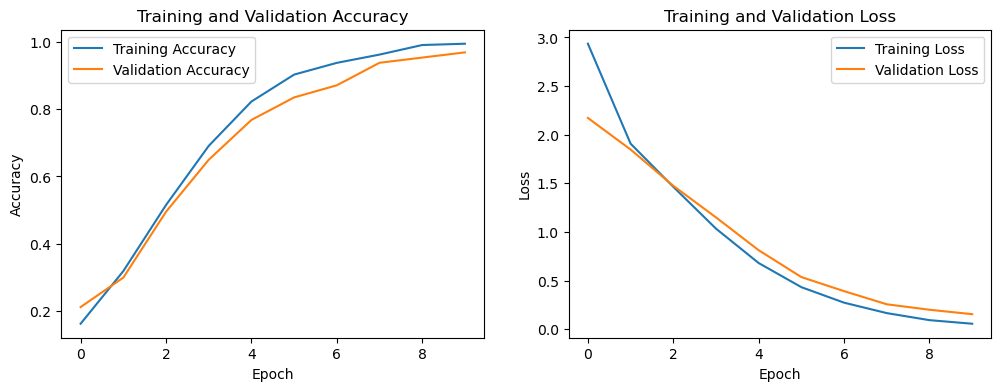

In [52]:
# Visualize training history
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


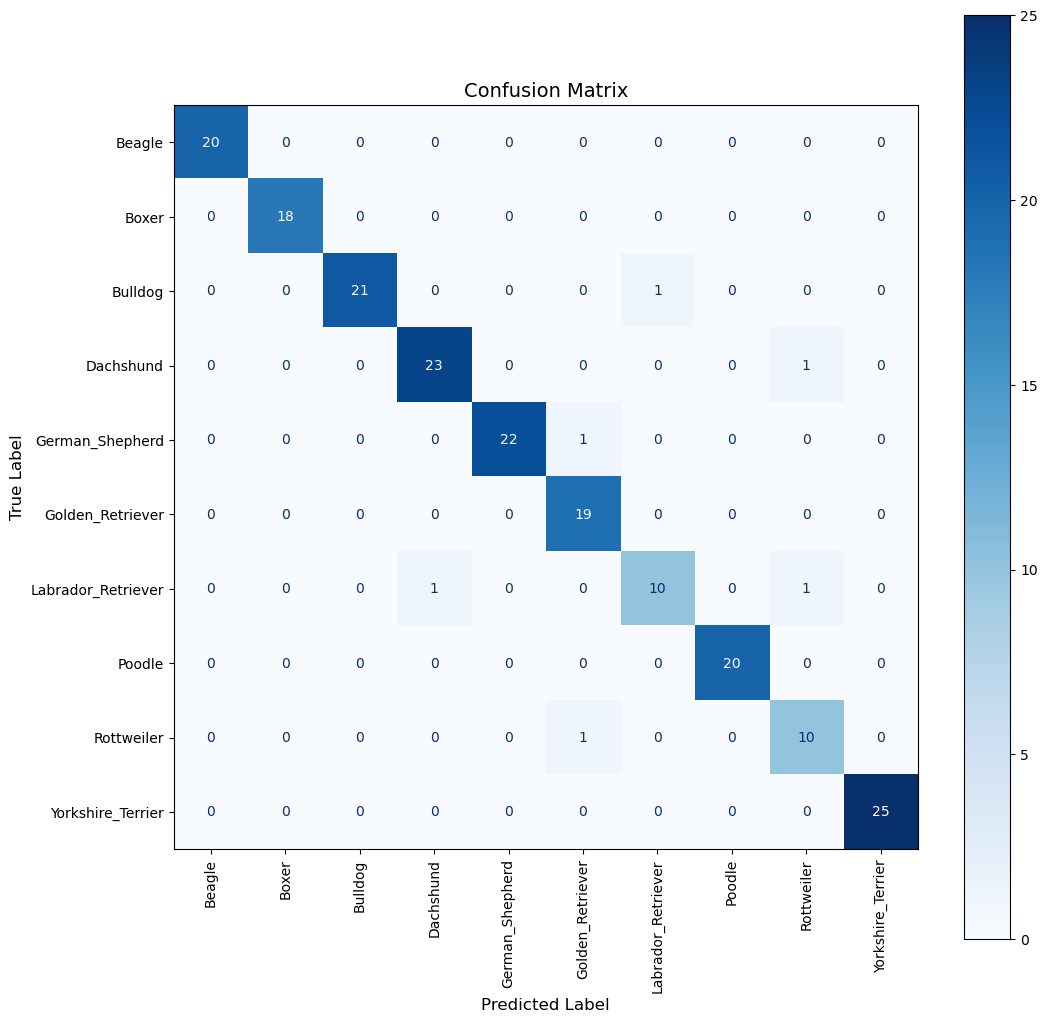

In [54]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

#The plot size
plt.figure(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, ax = plt.gca(), xticks_rotation='vertical')


#font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label', fontsize =12)
plt.ylabel('True Label', fontsize =12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()